# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

This project is about scrap popular movie released in year 2021 from website imdb.com. Imdb, stands for internet movie database, is a site that give information about movie related in detail, like what is the movie genre, when movie released, who is director, stars played in a movie, some trivia and most importantly, user review and voting that give result into imdb rating.

Most of people who want to watch movie in cinema, rent a DVD, or digital streaming service, they need to find review or watch trailer first before commit spent times and money. This is that will be provided by website imbd. Other than imbd, there are many similar website like rottentomatoes and metacritics.

We will scrap several points: title, imdb rating, vote count and metascore. From these points, we want to ascertain if rating from imdb is representing a sample of populace distributely enough or bias. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [3]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31&count=250')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [5]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [6]:
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8179402/">
    <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5


Finding row length.

In [7]:
#### judul , imdb rating , votes, dan metascore
judul_all = table.find_all('h3', attrs={'class':'lister-item-header'})
row_length = len(judul_all)

metascore_bar = table.find_all('div', attrs={'class':'ratings-bar'})

In [8]:
# debugging / testing code

# judul_all[4].text.strip().split('\n')[1]

# imdb_rating = metascore_bar[0].find('meta', attrs={'itemprop':'ratingValue'})['content']
# votes = metascore_bar[0].find('meta', attrs={'itemprop':'ratingCount'})['content']

# find_metascore = metascore_bar[3].find_all('span', attrs={'class':'metascore favorable'})
# metascore = find_metascore[0].text.strip() if (find_metascore) else 'missing' 

# genre_all = table.find_all('div', attrs={'class':'lister-item-content'})
# genre = genre_all[2].find('span', attrs={'class':'genre'}).text.strip()

In [9]:
#  jalan lain menuju roma
# ratings_bar =  table.find('div', attrs={'class':'ratings-bar'})
# imdb_rating = ratings_bar.find_all('div', attrs={'class':'ratings-imdb-rating'})[0]['data-value']

Do the scrapping process here (please change this markdown with your explanation)

In [10]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    #scrapping process
    judul = judul_all[i].text.strip().split('\n')[1]

    imdb_rating = metascore_bar[i].find('meta', attrs={'itemprop':'ratingValue'})['content']
    votes = metascore_bar[i].find('meta', attrs={'itemprop':'ratingCount'})['content']

    find_metascore = metascore_bar[i].find_all('span', attrs={'class':'metascore favorable'})
    metascore = find_metascore[0].text.strip() if (find_metascore) else 'missing' 
    
    temp.append((judul,imdb_rating,metascore,votes))
temp 

[('Fate: The Winx Saga', '6.9', 'missing', '44041'),
 ('The White Lotus', '7.6', 'missing', '67245'),
 ('Only Murders in the Building', '8.1', 'missing', '95898'),
 ('Abbott Elementary', '8.2', 'missing', '13457'),
 ('The Black Phone', '7', '65', '111706'),
 ('Resident Alien', '8.1', 'missing', '39033'),
 ('American Horror Stories', '6.2', 'missing', '20679'),
 ('1883', '8.8', 'missing', '62998'),
 ('Reservation Dogs', '8.1', 'missing', '14448'),
 ('Spider-Man: No Way Home', '8.3', '71', '729364'),
 ('La scuola cattolica', '5.7', 'missing', '1726'),
 ('Dune: Part One', '8', '74', '613613'),
 ('Licorice Pizza', '7.2', '90', '105017'),
 ('Forsvinningen på Lørenskog', '6.1', 'missing', '816'),
 ('Dopesick', '8.6', 'missing', '54339'),
 ("NCIS: Hawai'i", '6.3', 'missing', '5507'),
 ('Mona Lisa and the Blood Moon', '6.2', '69', '923'),
 ('The Little Things', '6.3', 'missing', '99434'),
 ('Bloodlands', '6.6', 'missing', '5056'),
 ('Arcane: League of Legends', '9', 'missing', '197443'),
 ('Ye

## Creating data frame & Data wrangling

Put the array into dataframe

In [11]:
import pandas as pd
col_movie = ['title','imdb','metascore','votes']
df = pd.DataFrame(temp,columns=col_movie)

Initially, we will sort best 7 `title` based on `imdb` rating

In [13]:
df.sort_values('imdb',ascending=False).head(7)

,title,imdb,metascore,votes
137,Clarkson's Farm,9,missing,35619
221,The Beatles: Get Back,9,missing,21987
19,Arcane: League of Legends,9,missing,197443
7,1883,8.8,missing,62998
58,Invincible,8.7,missing,131592
14,Dopesick,8.6,missing,54339
98,Maid,8.4,missing,81252


In this step, we want to compare imdb rating with metascore. So, we won't use movie that doesn't have metascore by excluding `missing`. 

In [27]:
df_clean = df[df['metascore'] != 'missing']

Next, we need to normalize both rating by using scale 1 to 10. 
Currently, imdb's scale is 1 to 100 and need to be normalized. 
Before normalizing, we need to change metascore and imdb's data types into numeric

In [30]:
df_clean[['imdb','metascore']] = df_clean[['imdb','metascore']].astype('float64')

df_clean['metascore'] = df_clean['metascore'] / 10
df_clean['metascore'] = df_clean['metascore'].round(1)
df_clean

C:\Users\62857\anaconda3\envs\python_38\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\62857\AppData\Local\Temp\ipykernel_16640\2339167677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['metascore'] = df_clean['metascore'] / 10
C:\Users\62857\AppData\Local\Temp\ipykernel_16640\2339167677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,title,imdb,metascore,votes
4,The Black Phone,7.0,6.5,111706
9,Spider-Man: No Way Home,8.3,7.1,729364
11,Dune: Part One,8.0,7.4,613613
12,Licorice Pizza,7.2,9.0,105017
16,Mona Lisa and the Blood Moon,6.2,6.9,923
...,...,...,...,...
229,The Mitchells vs the Machines,7.6,8.1,106853
230,Till Death,5.8,6.6,21274
234,The Rescue,8.3,8.4,15665
240,The Dig,7.1,7.3,74350


In the imdb's website FAQ, it is stated that calculation of imdb's rating is not arithmetic mean; instead rating displayed on a title's page is a weighted average. So, we can remove `votes` 

In [40]:
df_novotes = df_clean.drop('votes',axis=1)

First, we get top 7 title based on imdb rating

<AxesSubplot:ylabel='title'>

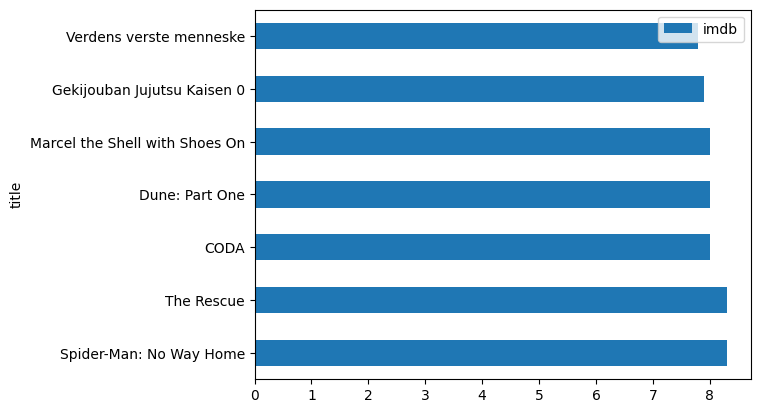

In [78]:
top_imbdb = df_novotes.sort_values('imdb',ascending=False).head(7)
top_imbdb.plot(kind='barh',x='title',y='imdb')

# x_topimdb = top_imbdb['title']
# y_topimdb = top_imbdb['imdb']

# import matplotlib.pyplot as plt
# # fig = plt.figure(figsize=(8,3),dpi=300)
# # fig.add_subplot()
# plt.locator_params(tight=True,nbins=1)
# plt.barh(x_topimdb,y_topimdb)

How about top 7 based on metascore ?

<AxesSubplot:ylabel='title'>

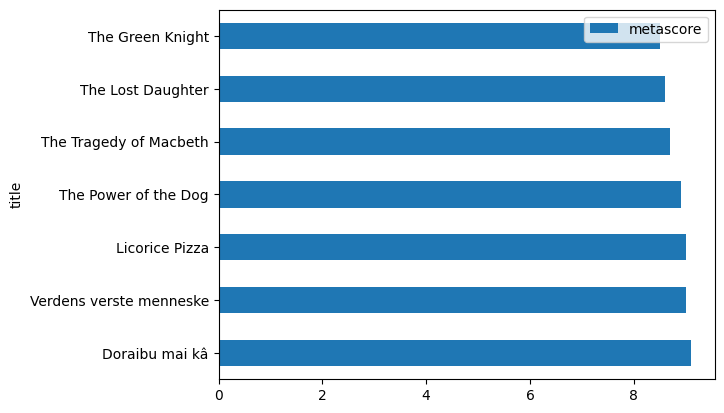

In [53]:
top_ms = df_novotes.sort_values('metascore',ascending=False).head(7)
top_ms.plot.barh(x='title',y='metascore')

Further analysis, imdb and metascore rating will be compared using `hist()`

array([[<AxesSubplot:title={'center':'imdb'}>,
        <AxesSubplot:title={'center':'metascore'}>],
       [<AxesSubplot:title={'center':'combined_rating'}>, <AxesSubplot:>]],
      dtype=object)

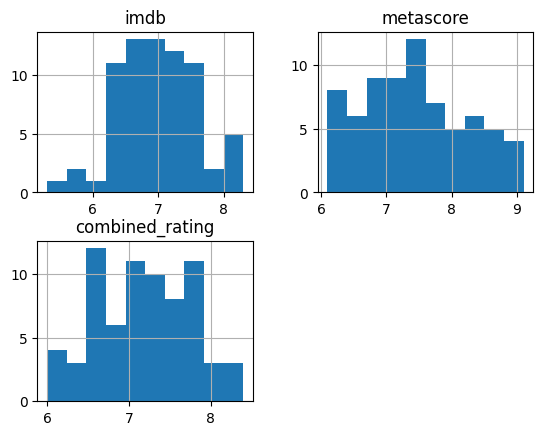

In [86]:
df_novotes.hist()
# imdb_hist = df_novotes['imdb']
# ms_hist = df_novotes['metascore'] 
# plt.hist(x_ms_hist)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

array([[<AxesSubplot:title={'center':'imdb'}>,
        <AxesSubplot:title={'center':'metascore'}>]], dtype=object)

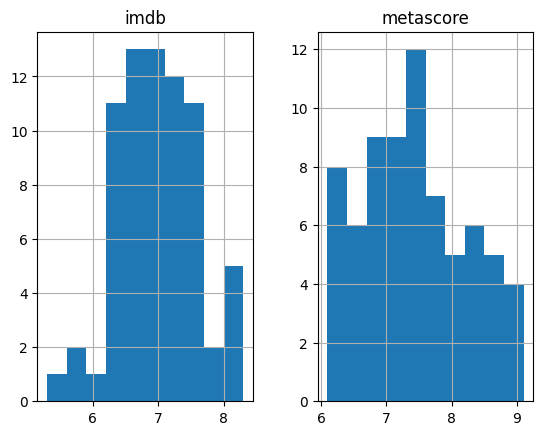

In [39]:
df_novotes.hist()

Based on both histogram, metascore resembles more as normal distribution. It has more bars around lowest and highest rating area.
In imdb's histogram, distribution tend to average area (x-axis between 6 and 8). 
<br><br>
It is possible because sampling is too small, initially 250 data then removed missing metascore into 70. 
Other reason, metascore is review from leading critics which is reviewer more filtered than imdb. 
<br><br>
Conclusion, metascore rating is better suited to movie enthusiast (considering all aspect of movie).

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.